In [ ]:
import pandas as pd
import io
import seaborn as sns

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
# Lista los archivos y carpetas en el directorio

#Además creo una carpeta que se llame Datasets, allí es donde voy a dejar el .csv
files = os.listdir("/content/drive/MyDrive/Datasets")
files

['dnrpa-robos-recuperos-autos-202201.csv']

In [ ]:
file_path = '/content/drive/MyDrive/Datasets/dnrpa-robos-recuperos-autos-202201.csv'

#dtype={"registro_seccional_codigo":"str"}

df = pd.read_csv(file_path, sep=",", dtype=str)
df.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-18,1994-06-03,1173,BERAZATEGUI Nº 2,Buenos Aires,Nacional,1994,NaN,FURGON VIDRID.C/ASIE,...,Privado,Física,BERAZATEGUI,BUENOS AIRES,Masculino,1972,ARGENTINA,100,06,ARG
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-31,2000-10-27,1120,LA MATANZA Nº 03,Buenos Aires,Nacional,2000,NaN,SEDAN,...,Privado,Física,LOMAS DEL MIRADOR,BUENOS AIRES,Femenino,1991,ARGENTINA,100,06,ARG
2,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-11,1994-04-28,2086,CAPITAL FEDERAL Nº 086,Ciudad Autónoma de Bs.As.,Nacional,1994,NaN,FUR.VIDRIADO C/ASIEN,...,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1971,PERU,100,02,NaN
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-10,1992-03-27,1119,MORON Nº 03,Buenos Aires,Importado,1991,NaN,RURAL 4 PTAS.,...,Privado,Física,HAEDO,BUENOS AIRES,No identificado,1982,ARGENTINA,50,06,ARG
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-24,2000-11-01,1118,QUILMES Nº 2,Buenos Aires,Nacional,2000,NaN,SEDAN 4 PUERTAS,...,Privado,Física,QUILMES OESTE,BUENOS AIRES,Masculino,1947,ARGENTINA,100,06,ARG


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   tramite_tipo                    2676 non-null   object
 1   tramite_fecha                   2676 non-null   object
 2   fecha_inscripcion_inicial       2676 non-null   object
 3   registro_seccional_codigo       2676 non-null   object
 4   registro_seccional_descripcion  2676 non-null   object
 5   registro_seccional_provincia    2676 non-null   object
 6   automotor_origen                2676 non-null   object
 7   automotor_anio_modelo           2671 non-null   object
 8   automotor_tipo_codigo           2601 non-null   object
 9   automotor_tipo_descripcion      2676 non-null   object
 10  automotor_marca_codigo          2644 non-null   object
 11  automotor_marca_descripcion     2676 non-null   object
 12  automotor_modelo_codigo         2640 non-null   

In [ ]:
# Omitir la primera y tercera fila del archivo CSV


df2 = pd.read_csv(file_path, sep=",", skiprows=[1,3])
df2.head()


,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-31,2000-10-27,1120,LA MATANZA Nº 03,Buenos Aires,Nacional,2000.0,NaN,SEDAN,...,Privado,Física,LOMAS DEL MIRADOR,BUENOS AIRES,Femenino,1991,ARGENTINA,100,6,ARG
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-10,1992-03-27,1119,MORON Nº 03,Buenos Aires,Importado,1991.0,NaN,RURAL 4 PTAS.,...,Privado,Física,HAEDO,BUENOS AIRES,No identificado,1982,ARGENTINA,50,6,ARG
2,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-24,2000-11-01,1118,QUILMES Nº 2,Buenos Aires,Nacional,2000.0,NaN,SEDAN 4 PUERTAS,...,Privado,Física,QUILMES OESTE,BUENOS AIRES,Masculino,1947,ARGENTINA,100,6,ARG
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-03,1995-11-10,4058,EMBALSE,Córdoba,Nacional,1995.0,NaN,CHASIS C/CABINA P/CA,...,Privado,Física,VILLA RUMIPAL,CORDOBA,Masculino,1980,ARGENTINA,100,14,ARG
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-12,2000-04-05,1113,SAN VICENTE,Buenos Aires,Nacional,2000.0,NaN,3 PTAS,...,Privado,Física,GUERNICA,BUENOS AIRES,Femenino,1978,PARAGUAY,100,6,PRY


In [ ]:
# nos quedamos con 2 filas
df2 = pd.read_csv(file_path,  nrows=2)
df2.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-18,1994-06-03,1173,BERAZATEGUI Nº 2,Buenos Aires,Nacional,1994,NaN,FURGON VIDRID.C/ASIE,...,Privado,Física,BERAZATEGUI,BUENOS AIRES,Masculino,1972,ARGENTINA,100,6,ARG
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-31,2000-10-27,1120,LA MATANZA Nº 03,Buenos Aires,Nacional,2000,NaN,SEDAN,...,Privado,Física,LOMAS DEL MIRADOR,BUENOS AIRES,Femenino,1991,ARGENTINA,100,6,ARG


In [ ]:
len(df2)

2

In [ ]:
df.shape

(2676, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   tramite_tipo                    2676 non-null   object
 1   tramite_fecha                   2676 non-null   object
 2   fecha_inscripcion_inicial       2676 non-null   object
 3   registro_seccional_codigo       2676 non-null   object
 4   registro_seccional_descripcion  2676 non-null   object
 5   registro_seccional_provincia    2676 non-null   object
 6   automotor_origen                2676 non-null   object
 7   automotor_anio_modelo           2671 non-null   object
 8   automotor_tipo_codigo           2601 non-null   object
 9   automotor_tipo_descripcion      2676 non-null   object
 10  automotor_marca_codigo          2644 non-null   object
 11  automotor_marca_descripcion     2676 non-null   object
 12  automotor_modelo_codigo         2640 non-null   

In [ ]:
df2=df
# renombrar un dataframe

In [ ]:
df2['tramite_fecha'].value_counts()

,count
tramite_fecha,
2022-01-25,150
2022-01-27,149
2022-01-31,141
2022-01-17,141
2022-01-19,140
2022-01-26,135
2022-01-18,131
2022-01-13,130
2022-01-20,130


In [ ]:
df2['tramite_fecha']= pd.to_datetime(df2['tramite_fecha']) # Formato datetime python
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tramite_tipo                    2676 non-null   object        
 1   tramite_fecha                   2676 non-null   datetime64[ns]
 2   fecha_inscripcion_inicial       2676 non-null   object        
 3   registro_seccional_codigo       2676 non-null   object        
 4   registro_seccional_descripcion  2676 non-null   object        
 5   registro_seccional_provincia    2676 non-null   object        
 6   automotor_origen                2676 non-null   object        
 7   automotor_anio_modelo           2671 non-null   object        
 8   automotor_tipo_codigo           2601 non-null   object        
 9   automotor_tipo_descripcion      2676 non-null   object        
 10  automotor_marca_codigo          2644 non-null   object        
 11  auto

In [ ]:

monthly_accidents = df2.groupby(df2['tramite_fecha'].dt.to_period('D')).size()


monthly_accidents

,0
tramite_fecha,
2022-01-03,103
2022-01-04,105
2022-01-05,127
2022-01-06,108
2022-01-07,110
2022-01-10,127
2022-01-11,117
2022-01-12,127
2022-01-13,130


In [ ]:
df2.automotor_marca_codigo.unique()

array(['37', '08', nan, '29', '112', '092', '07', '34', '158', '19',
       '044', '67', '137', '047', '136', '024', '093', '072', '53', '68',
       '69', '127', '33', '09', '104', '027', '51', '17', '13', '004',
       'C07', '018', 'AC', '31', '4F', '80', '063', 'D34', '061', '3A',
       'D18', '032', '15', '025', '102', '40', '011', '151', '130', '055',
       '271', '180', '058', 'G89', 'P04', '121', 'NO', '031', '126',
       '115', '089', '208'], dtype=object)

In [ ]:
agrupado = df2.groupby(df2['tramite_fecha'].dt.to_period('D')).agg({'automotor_marca_codigo': 'count'})
agrupado

,automotor_marca_codigo
tramite_fecha,
2022-01-03,102
2022-01-04,105
2022-01-05,125
2022-01-06,105
2022-01-07,109
2022-01-10,124
2022-01-11,117
2022-01-12,125
2022-01-13,129


In [ ]:
agrupado = df2.groupby(df2['tramite_fecha'].dt.to_period('D')).size()
agrupado

,0
tramite_fecha,
2022-01-03,103
2022-01-04,105
2022-01-05,127
2022-01-06,108
2022-01-07,110
2022-01-10,127
2022-01-11,117
2022-01-12,127
2022-01-13,130


count(): Este método cuenta el número de valores no nulos en cada columna del grupo.


size(): Este método cuenta el número total de elementos en cada grupo, incluyendo los valores nulos.

In [ ]:
#esto es para meses cambiar en period la D por la M

monthly_accidents2 = df2.groupby(df2['tramite_fecha'].dt.to_period('M')).size()


monthly_accidents2

,0
tramite_fecha,
2022-01,2676


<Axes: xlabel='tramite_fecha'>

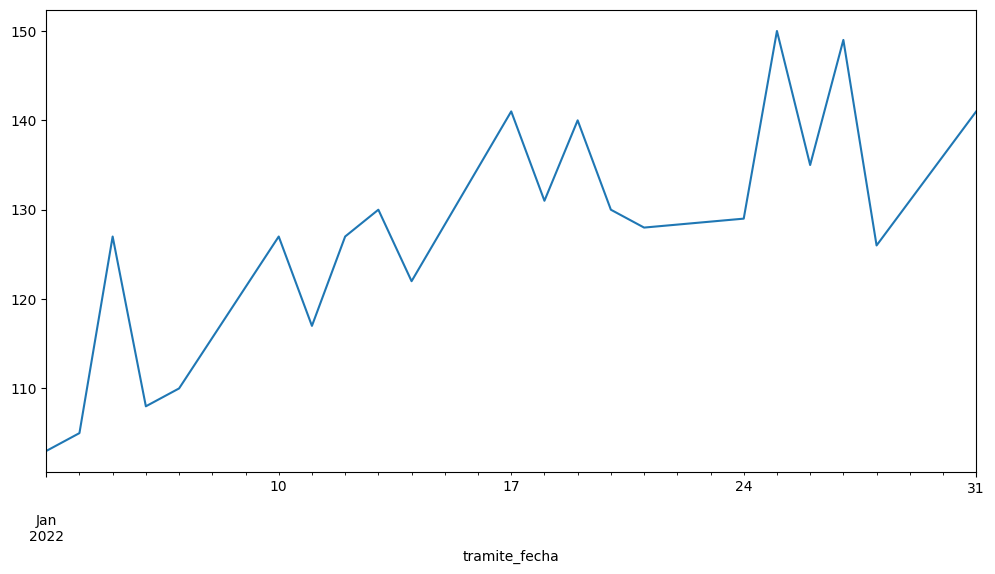

In [ ]:
monthly_accidents.plot.line(figsize=(12,6))

Usemos ahora un dataset de ejemplo para seguir practicando con fechas

In [ ]:

# Crear las listas de fechas y temperaturas
fechas = ['02/01/2023', '01/02/2023', '01/03/2023', '01/04/2023']
temperaturas = (25, 28, 26, 30)

# Crear el DataFrame utilizando las listas
data= pd.DataFrame({'Fecha': fechas, 'Temperatura': temperaturas})

data

,Fecha,Temperatura
0,02/01/2023,25
1,01/02/2023,28
2,01/03/2023,26
3,01/04/2023,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fecha        4 non-null      object
 1   Temperatura  4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [ ]:
# Convertir la columna 'Fecha' al tipo datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])
data



,Fecha,Temperatura
0,2023-02-01,25
1,2023-01-02,28
2,2023-01-03,26
3,2023-01-04,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        4 non-null      datetime64[ns]
 1   Temperatura  4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 192.0 bytes


**veamos otra forma de hacer lo mismo**

In [ ]:
# Crear las listas de fechas y temperaturas
import numpy as np
fechas = ['02/01/2023', '01/02/2023', '01/03/2023', '01/04/2023']
temperaturas = np.array([25, 28, 26, 30])

# Crear el DataFrame utilizando las listas
data= pd.DataFrame({'Fecha': fechas, 'Temperatura': temperaturas})
data

,Fecha,Temperatura
0,02/01/2023,25
1,01/02/2023,28
2,01/03/2023,26
3,01/04/2023,30


In [ ]:
# Convertir la columna 'Fecha' al tipo datetime

data['Fecha'] = data['Fecha'].astype('datetime64[ns]')
data

,Fecha,Temperatura
0,2023-02-01,25
1,2023-01-02,28
2,2023-01-03,26
3,2023-01-04,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        4 non-null      datetime64[ns]
 1   Temperatura  4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 192.0 bytes


In [ ]:
data["dia"]=data["Fecha"].dt.strftime("%d")
data["mes"]=data["Fecha"].dt.strftime("%m")
data["año"]=data["Fecha"].dt.strftime("%Y")
data

,Fecha,Temperatura,dia,mes,año
0,2023-02-01,25,01,02,2023
1,2023-01-02,28,02,01,2023
2,2023-01-03,26,03,01,2023
3,2023-01-04,30,04,01,2023


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        4 non-null      datetime64[ns]
 1   Temperatura  4 non-null      int64         
 2   dia          4 non-null      object        
 3   mes          4 non-null      object        
 4   año          4 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 288.0+ bytes


In [ ]:
# Obtener la fecha en formato día mes año
data['Fecha'] = data['Fecha'].dt.strftime("%d/%m/%Y")

data

,Fecha,Temperatura,dia,mes,año
0,01/02/2023,25,01,02,2023
1,02/01/2023,28,02,01,2023
2,03/01/2023,26,03,01,2023
3,04/01/2023,30,04,01,2023


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fecha        4 non-null      object
 1   Temperatura  4 non-null      int64 
 2   dia          4 non-null      object
 3   mes          4 non-null      object
 4   año          4 non-null      object
dtypes: int64(1), object(4)
memory usage: 288.0+ bytes


**más ejemplos**

In [ ]:

# Crear las listas de fechas y temperaturas
fechas = ['02/01/2023', '01/02/2023', '01/03/2023', '01/04/2023']
temperaturas = [25, 28, 26, 30]

# Crear el DataFrame utilizando las listas
data2= pd.DataFrame({'Fecha': fechas, 'Temperatura': temperaturas})

data2


,Fecha,Temperatura
0,02/01/2023,25
1,01/02/2023,28
2,01/03/2023,26
3,01/04/2023,30


In [ ]:
# Convertir la columna 'Fecha' al tipo datetime
data2['Fecha'] = pd.to_datetime(data2['Fecha'])
data2

,Fecha,Temperatura
0,2023-02-01,25
1,2023-01-02,28
2,2023-01-03,26
3,2023-01-04,30


In [ ]:
# Extraer el día de la columna 'Fecha'
data2['Dia'] = data2['Fecha'].dt.day
data2['Mes'] = data2['Fecha'].dt.month
data2['Year'] = data2['Fecha'].dt.year
data2

,Fecha,Temperatura,Dia,Mes,Year
0,2023-02-01,25,1,2,2023
1,2023-01-02,28,2,1,2023
2,2023-01-03,26,3,1,2023
3,2023-01-04,30,4,1,2023


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        4 non-null      datetime64[ns]
 1   Temperatura  4 non-null      int64         
 2   Dia          4 non-null      int32         
 3   Mes          4 non-null      int32         
 4   Year         4 non-null      int32         
dtypes: datetime64[ns](1), int32(3), int64(1)
memory usage: 240.0 bytes


La principal diferencia es que df['Fecha'].dt.day devuelve el día como un número entero, mientras que df['Fecha'].dt.strftime("%d") devuelve el día como una cadena de texto con dos dígitos (agregando un cero al inicio si es necesario para mantener el formato de dos dígitos)

In [ ]:
agrupacion= data2.groupby(data2.Mes).size()
agrupacion

,0
Mes,
1,3
2,1


<Axes: xlabel='Mes', ylabel='None'>

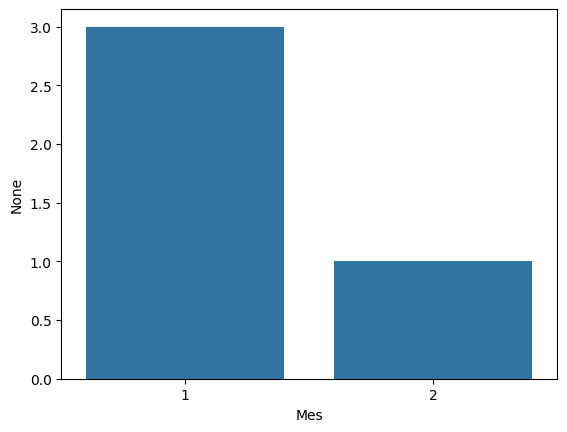

In [ ]:
sns.barplot(x=agrupacion.index, y=agrupacion)

In [ ]:
agrupadoV2= data2.groupby(data2['Fecha'].dt.to_period('M')).size()
agrupadoV2

,0
Fecha,
2023-01,3
2023-02,1


# Marcas más robadas

In [ ]:
df2['automotor_marca_descripcion'].value_counts()

#VOLSKWAGEN

,count
automotor_marca_descripcion,
VOLKSWAGEN,497
RENAULT,398
CHEVROLET,368
FIAT,367
PEUGEOT,330
FORD,297
TOYOTA,122
CITROEN,98
MERCEDES BENZ,26


In [ ]:
top10= (df2['automotor_marca_descripcion'].value_counts())[:10]
top10

,count
automotor_marca_descripcion,
VOLKSWAGEN,497
RENAULT,398
CHEVROLET,368
FIAT,367
PEUGEOT,330
FORD,297
TOYOTA,122
CITROEN,98
MERCEDES BENZ,26


<Axes: title={'center': 'Marcas más robadas'}, xlabel='automotor_marca_descripcion', ylabel='Frecuencia'>

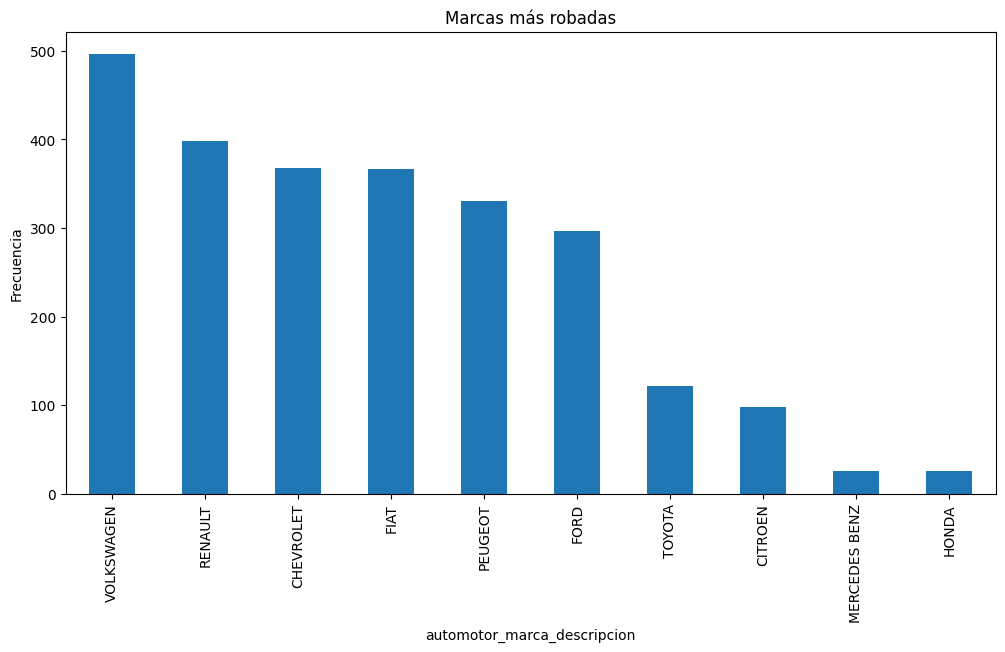

In [ ]:
(df2['automotor_marca_descripcion'].value_counts()[:10]).plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Marcas más robadas')

#trazado integrada de pandas. Aquí se utiliza el método plot() de pandas con el argumento kind='bar' para crear un gráfico de barras

In [ ]:
df2['automotor_modelo_descripcion'].value_counts()[0:50]

,count
automotor_modelo_descripcion,
GOL 1.6,40
GOL TREND 1.6,28
FIORINO FIRE 1242 MPI 8V,26
VOYAGE 1.6,23
CLASSIC 4 P LS ABS+AIRBAG 1.4N,19
RENAULT 9 RL,18
FOX 1.6,18
UNO FIRE 1242 MPI 8V,17
GOL TREND 1.6 GP,15


<Axes: title={'center': 'Modelos más robados'}, xlabel='automotor_modelo_descripcion', ylabel='Frecuencia'>

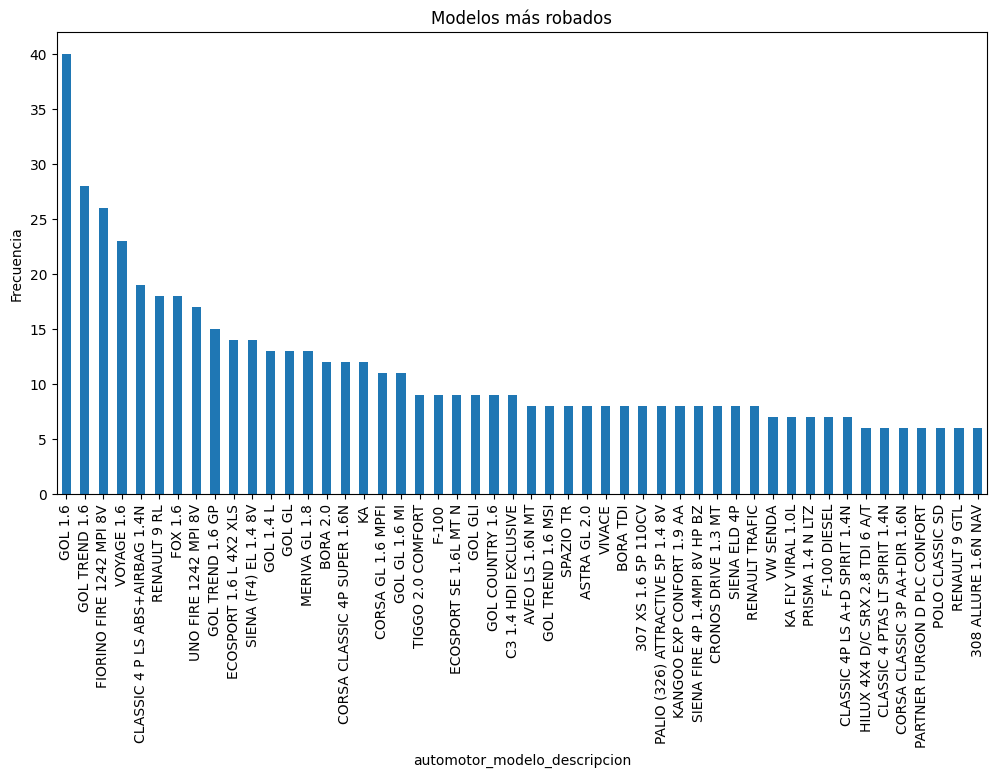

In [ ]:
(df2['automotor_modelo_descripcion'].value_counts())[0:50].plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Modelos más robados')

#tomarlo como un mal ejemplo porque tenemos muchas barras

<Axes: title={'center': 'Robos por genero'}, xlabel='titular_genero', ylabel='Frecuencia'>

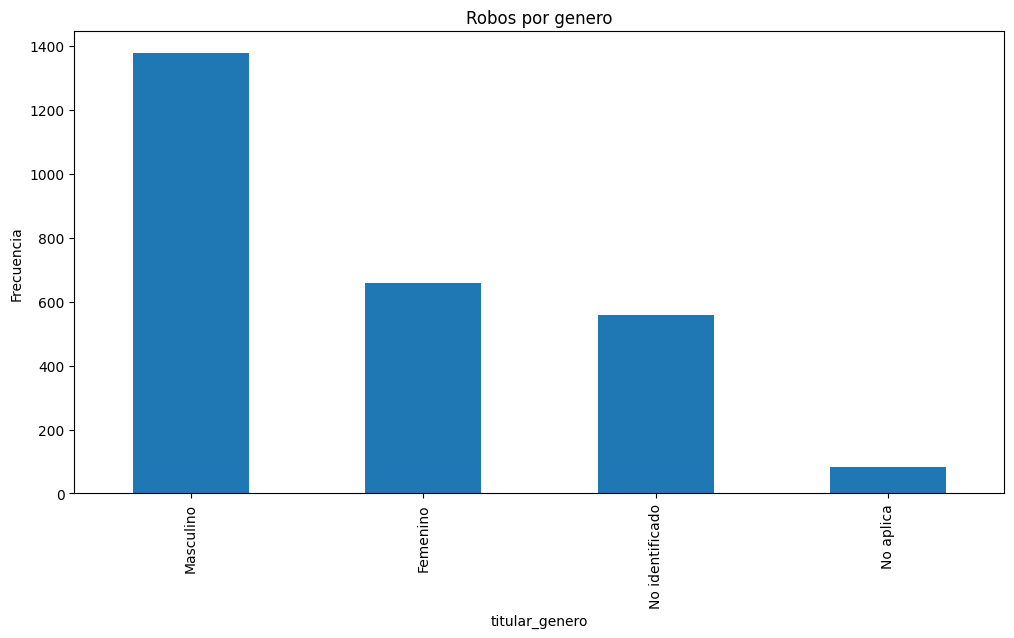

In [ ]:
df2['titular_genero'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Robos por genero')

<Axes: title={'center': 'Procedencia del titular'}, xlabel='titular_pais_nacimiento', ylabel='Frecuencia'>

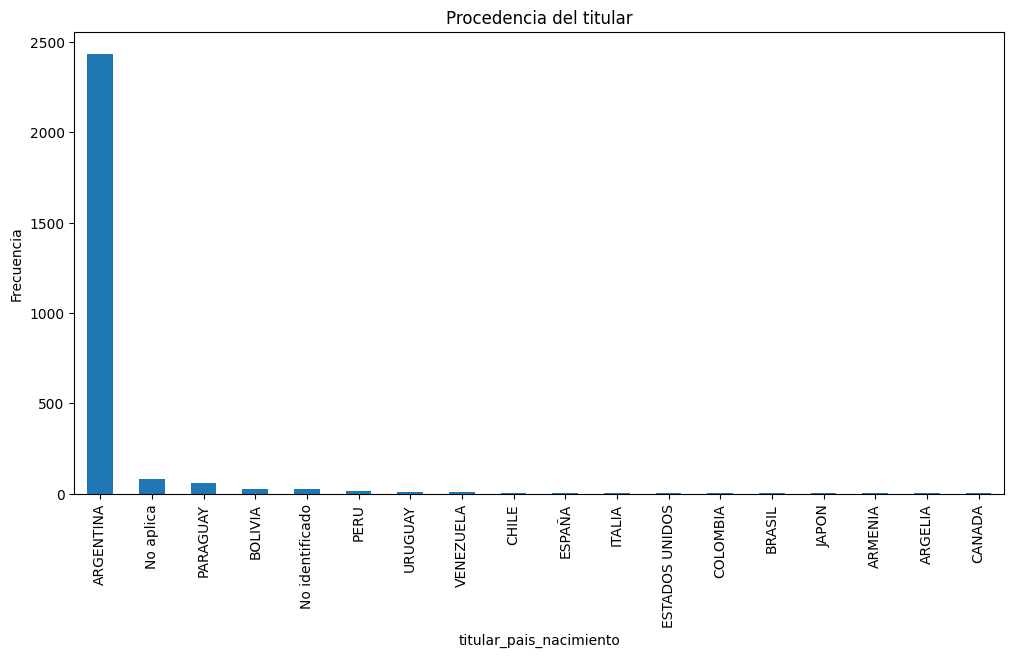

In [ ]:
df2['titular_pais_nacimiento'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Procedencia del titular')

<Axes: title={'center': 'Procedencia del titular'}, xlabel='titular_domicilio_provincia', ylabel='Frecuencia'>

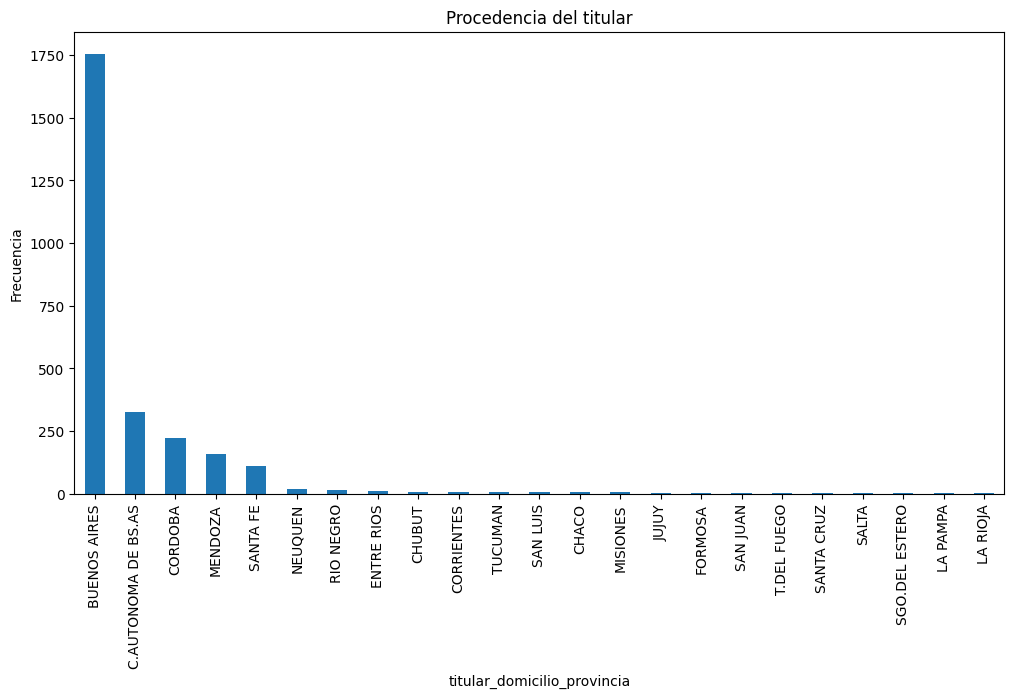

In [ ]:
df2['titular_domicilio_provincia'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Procedencia del titular')

# JSON

In [ ]:
# De una URL
URL = 'http://raw.githubusercontent.com/BindiChen/machine-learning/master/data-analysis/027-pandas-convert-json/data/simple.json'
df = pd.read_json(URL)
df.head(10)

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [ ]:
# Miremos este caso especial
df_json = pd.read_json('nested_json.json')
df_json # tenemos un JSON nested

,school_name,class,students
0,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


In [ ]:
import json

# Abrir el archivo JSON
with open('nested_json.json', 'r') as file:
    # Cargar el contenido del archivo en una variable
    data = json.load(file)

In [ ]:
data

{'school_name': 'ABC primary school',
 'class': 'Year 1',
 'students': [{'id': 'A001',
   'name': 'Tom',
   'math': 60,
   'physics': 66,
   'chemistry': 61},
  {'id': 'A002', 'name': 'James', 'math': 89, 'physics': 76, 'chemistry': 51},
  {'id': 'A003', 'name': 'Jenny', 'math': 79, 'physics': 90, 'chemistry': 78}]}

In [ ]:
# Abrir el JSON con pandas
df = pd.json_normalize(data, 'students', ['school_name', 'class'])
df

,id,name,math,physics,chemistry,school_name,class
0,A001,Tom,60,66,61,ABC primary school,Year 1
1,A002,James,89,76,51,ABC primary school,Year 1
2,A003,Jenny,79,90,78,ABC primary school,Year 1


In [ ]:
data

{'school_name': 'ABC primary school',
 'class': 'Year 1',
 'students': [{'id': 'A001',
   'name': 'Tom',
   'math': 60,
   'physics': 66,
   'chemistry': 61},
  {'id': 'A002', 'name': 'James', 'math': 89, 'physics': 76, 'chemistry': 51},
  {'id': 'A003', 'name': 'Jenny', 'math': 79, 'physics': 90, 'chemistry': 78}]}

#Tan solo para practicar hagamos el camino más complicado:

In [ ]:
#Creamos las listas para introducir adentro los datos de los diccionarios id 	name 	math 	physics 	chemistry
id=[]
name=[]
math=[]
physics=[]
chemistry=[]

for i in data["students"]:
    id.append(i["id"])
    name.append(i["name"])
    math.append(i["math"])
    physics.append(i["physics"])
    chemistry.append(i["chemistry"])

df_practica= pd.DataFrame({"id":id, "name":name, "math":math, "physics": physics, "chemistry": chemistry})
df_practica

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [ ]:
df_json

,school_name,class,students
0,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


In [ ]:
df_final=pd.concat([df_practica, df_json], axis=1)
df_final

,id,name,math,physics,chemistry,school_name,class,students
0,A001,Tom,60,66,61,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,A002,James,89,76,51,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,A003,Jenny,79,90,78,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


In [ ]:
df_final.drop("students", axis=1, inplace=True)
df_final

,id,name,math,physics,chemistry,school_name,class
0,A001,Tom,60,66,61,ABC primary school,Year 1
1,A002,James,89,76,51,ABC primary school,Year 1
2,A003,Jenny,79,90,78,ABC primary school,Year 1


In [ ]:
df_practica


,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [ ]:
df_json

,school_name,class,students
0,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


In [ ]:
# cambiemos el index
df_practica.index=[4,5,6]
df_practica

,id,name,math,physics,chemistry
4,A001,Tom,60,66,61
5,A002,James,89,76,51
6,A003,Jenny,79,90,78


In [ ]:
df_final=pd.concat([df_practica, df_json], axis=1)
df_final

,id,name,math,physics,chemistry,school_name,class,students
4,A001,Tom,60.0,66.0,61.0,NaN,NaN,NaN
5,A002,James,89.0,76.0,51.0,NaN,NaN,NaN
6,A003,Jenny,79.0,90.0,78.0,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,NaN,NaN,NaN,NaN,NaN,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,NaN,NaN,NaN,NaN,NaN,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


para evitar eso hagamos un reset_index

In [ ]:
df_practica= df_practica.reset_index(drop=True)
df_practica

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [ ]:
df_final=pd.concat([df_practica, df_json], axis=1)
df_final.drop("students", axis=1, inplace=True)
df_final

# ahora si quedo igual que antes

,id,name,math,physics,chemistry,school_name,class
0,A001,Tom,60,66,61,ABC primary school,Year 1
1,A002,James,89,76,51,ABC primary school,Year 1
2,A003,Jenny,79,90,78,ABC primary school,Year 1
